In [ ]:
import torch
import torch.nn.functional as F
from torch import nn
import re
from urllib import request

# Load the text data
url = "https://www.gutenberg.org/files/1661/1661-0.txt"
response = request.urlopen(url)
text = response.read().decode('utf-8')

# Preprocess the text
text = text.lower().replace('\n', ' ')
words = text.split()
words = [word.strip('.,!?";:()[]') for word in words if len(word) > 2]  # Remove punctuation and short words

# Create vocabulary
vocab = sorted(set(words))
stoi = {s: i + 1 for i, s in enumerate(vocab)}  # word to index
itos = {i: s for s, i in stoi.items()}  # index to word

# Prepare the dataset
block_size = 10  # Number of previous words to predict the next one
X, Y = [], []

for i in range(len(words) - block_size):
    X.append([stoi[w] for w in words[i:i + block_size]])
    Y.append(stoi[words[i + block_size]])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move data to GPU
X = torch.tensor(X).to(device)
Y = torch.tensor(Y).to(device)

# Define the MLP model
class NextWordMLP(nn.Module):
    def __init__(self, vocab_size, emb_dim, hidden_size, activation='relu'):
        super().__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.fc1 = nn.Linear(emb_dim * block_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, vocab_size)

        # Set the activation function
        if activation == 'relu':
            self.activation = nn.ReLU()
        elif activation == 'tanh':
            self.activation = nn.Tanh()
        elif activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        else:
            raise ValueError("Unsupported activation function. Choose from 'relu', 'tanh', or 'sigmoid'.")

    def forward(self, x):
        x = self.emb(x)  # Shape: (batch_size, block_size, emb_dim)
        x = x.view(x.size(0), -1)  # Flatten to (batch_size, block_size * emb_dim)
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

# Initialize and train the model
emb_dim = 64
activation = 'relu'  # Change this to 'tanh' or 'sigmoid' as needed
model = NextWordMLP(len(stoi) + 1, emb_dim, 128, activation).to(device)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.AdamW(model.parameters(), lr=0.001)

# Training loop
batch_size = 512
for epoch in range(500):  # Reduce epoch for quicker training
    for i in range(0, X.shape[0], batch_size):
        x = X[i:i + batch_size]
        y = Y[i:i + batch_size]
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
        opt.step()
        opt.zero_grad()
    print(f'Epoch: {epoch}, Loss: {loss.item()}')

# Save the trained model and vocabulary
torch.save({
    'model_state_dict': model.state_dict(),
    'stoi': stoi,
    'itos': itos,
    'block_size': block_size,
    'emb_dim': emb_dim,
    'activation': activation,
}, 'trained_model_10_64_relu.pth')


Epoch: 0, Loss: 8.253108024597168
Epoch: 1, Loss: 7.5538458824157715
Epoch: 2, Loss: 6.9404826164245605
Epoch: 3, Loss: 6.270946979522705
Epoch: 4, Loss: 5.444431304931641
Epoch: 5, Loss: 4.463929176330566
Epoch: 6, Loss: 3.630117893218994
Epoch: 7, Loss: 3.132969379425049
Epoch: 8, Loss: 2.8181889057159424
Epoch: 9, Loss: 2.5814990997314453
Epoch: 10, Loss: 2.3891701698303223
Epoch: 11, Loss: 2.224639654159546
Epoch: 12, Loss: 2.082214593887329
Epoch: 13, Loss: 1.9582651853561401
Epoch: 14, Loss: 1.8509658575057983
Epoch: 15, Loss: 1.754125714302063
Epoch: 16, Loss: 1.663224697113037
Epoch: 17, Loss: 1.5824570655822754
Epoch: 18, Loss: 1.5068684816360474
Epoch: 19, Loss: 1.4355195760726929
Epoch: 20, Loss: 1.366905689239502
Epoch: 21, Loss: 1.3023841381072998
Epoch: 22, Loss: 1.239965558052063
Epoch: 23, Loss: 1.1783822774887085
Epoch: 24, Loss: 1.1164973974227905
Epoch: 25, Loss: 1.0564357042312622
Epoch: 26, Loss: 0.9991075396537781
Epoch: 27, Loss: 0.9448041319847107
Epoch: 28, Los

In [ ]:


  # Prepare the dataset
  block_size = 5  # Number of previous words to predict the next one
  X, Y = [], []

  for i in range(len(words) - block_size):
      X.append([stoi[w] for w in words[i:i + block_size]])
      Y.append(stoi[words[i + block_size]])

  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

  # Move data to GPU
  X = torch.tensor(X).to(device)
  Y = torch.tensor(Y).to(device)

  # Define the MLP model
  class NextWordMLP(nn.Module):
      def __init__(self, vocab_size, emb_dim, hidden_size, activation='relu'):
          super().__init__()
          self.emb = nn.Embedding(vocab_size, emb_dim)
          self.fc1 = nn.Linear(emb_dim * block_size, hidden_size)
          self.fc2 = nn.Linear(hidden_size, vocab_size)

          # Set the activation function
          if activation == 'relu':
              self.activation = nn.ReLU()
          elif activation == 'tanh':
              self.activation = nn.Tanh()
          elif activation == 'sigmoid':
              self.activation = nn.Sigmoid()
          else:
              raise ValueError("Unsupported activation function. Choose from 'relu', 'tanh', or 'sigmoid'.")

      def forward(self, x):
          x = self.emb(x)  # Shape: (batch_size, block_size, emb_dim)
          x = x.view(x.size(0), -1)  # Flatten to (batch_size, block_size * emb_dim)
          x = self.fc1(x)
          x = self.activation(x)
          x = self.fc2(x)
          return x

  # Initialize and train the model
  emb_dim = 128
  activation = 'tanh'  # Change this to 'tanh' or 'sigmoid' as needed
  model = NextWordMLP(len(stoi) + 1, emb_dim, 128, activation).to(device)
  loss_fn = nn.CrossEntropyLoss()
  opt = torch.optim.AdamW(model.parameters(), lr=0.001)

  # Training loop
  batch_size = 512
  for epoch in range(500):  # Reduce epoch for quicker training
      for i in range(0, X.shape[0], batch_size):
          x = X[i:i + batch_size]
          y = Y[i:i + batch_size]
          y_pred = model(x)
          loss = loss_fn(y_pred, y)
          loss.backward()
          torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
          opt.step()
          opt.zero_grad()
      print(f'Epoch: {epoch}, Loss: {loss.item()}')

  # Save the trained model and vocabulary
  torch.save({
      'model_state_dict': model.state_dict(),
      'stoi': stoi,
      'itos': itos,
      'block_size': block_size,
      'emb_dim': emb_dim,
      'activation': activation,
  }, 'trained_model_5_128_tanh.pth')


Epoch: 0, Loss: 8.673714637756348
Epoch: 1, Loss: 7.718428134918213
Epoch: 2, Loss: 7.027989387512207
Epoch: 3, Loss: 6.4449334144592285
Epoch: 4, Loss: 5.946618556976318
Epoch: 5, Loss: 5.499574661254883
Epoch: 6, Loss: 5.079165458679199
Epoch: 7, Loss: 4.6753692626953125
Epoch: 8, Loss: 4.297863960266113
Epoch: 9, Loss: 3.9464595317840576
Epoch: 10, Loss: 3.6218655109405518
Epoch: 11, Loss: 3.3198394775390625
Epoch: 12, Loss: 3.040300130844116
Epoch: 13, Loss: 2.7814507484436035
Epoch: 14, Loss: 2.5447943210601807
Epoch: 15, Loss: 2.3272502422332764
Epoch: 16, Loss: 2.1278440952301025
Epoch: 17, Loss: 1.9429484605789185
Epoch: 18, Loss: 1.7751718759536743
Epoch: 19, Loss: 1.6167782545089722
Epoch: 20, Loss: 1.474145531654358
Epoch: 21, Loss: 1.3392846584320068
Epoch: 22, Loss: 1.2180719375610352
Epoch: 23, Loss: 1.1096935272216797
Epoch: 24, Loss: 1.0102531909942627
Epoch: 25, Loss: 0.9214450120925903
Epoch: 26, Loss: 0.8397054672241211
Epoch: 27, Loss: 0.7666102647781372
Epoch: 28, 

In [ ]:


# Prepare the dataset
block_size = 5  # Number of previous words to predict the next one
X, Y = [], []

for i in range(len(words) - block_size):
    X.append([stoi[w] for w in words[i:i + block_size]])
    Y.append(stoi[words[i + block_size]])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move data to GPU
X = torch.tensor(X).to(device)
Y = torch.tensor(Y).to(device)

# Define the MLP model
class NextWordMLP(nn.Module):
    def __init__(self, vocab_size, emb_dim, hidden_size, activation='relu'):
        super().__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.fc1 = nn.Linear(emb_dim * block_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, vocab_size)

        # Set the activation function
        if activation == 'relu':
            self.activation = nn.ReLU()
        elif activation == 'tanh':
            self.activation = nn.Tanh()
        elif activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        else:
            raise ValueError("Unsupported activation function. Choose from 'relu', 'tanh', or 'sigmoid'.")

    def forward(self, x):
        x = self.emb(x)  # Shape: (batch_size, block_size, emb_dim)
        x = x.view(x.size(0), -1)  # Flatten to (batch_size, block_size * emb_dim)
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

# Initialize and train the model
emb_dim = 64
activation = 'relu'  # Change this to 'tanh' or 'sigmoid' as needed
model = NextWordMLP(len(stoi) + 1, emb_dim, 128, activation).to(device)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.AdamW(model.parameters(), lr=0.001)

# Training loop
batch_size = 512
for epoch in range(250):  # Reduce epoch for quicker training
    for i in range(0, X.shape[0], batch_size):
        x = X[i:i + batch_size]
        y = Y[i:i + batch_size]
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
        opt.step()
        opt.zero_grad()
    print(f'Epoch: {epoch}, Loss: {loss.item()}')

# Save the trained model and vocabulary
torch.save({
    'model_state_dict': model.state_dict(),
    'stoi': stoi,
    'itos': itos,
    'block_size': block_size,
    'emb_dim': emb_dim,
    'activation': activation,
}, 'trained_model_5_64_relu.pth')


Epoch: 0, Loss: 8.33010196685791
Epoch: 1, Loss: 7.648670196533203
Epoch: 2, Loss: 7.0389862060546875
Epoch: 3, Loss: 6.382065773010254
Epoch: 4, Loss: 5.5773234367370605
Epoch: 5, Loss: 4.6474432945251465
Epoch: 6, Loss: 3.8237690925598145
Epoch: 7, Loss: 3.307467460632324
Epoch: 8, Loss: 2.994114637374878
Epoch: 9, Loss: 2.774240016937256
Epoch: 10, Loss: 2.5978147983551025
Epoch: 11, Loss: 2.4483330249786377
Epoch: 12, Loss: 2.31909441947937
Epoch: 13, Loss: 2.2066762447357178
Epoch: 14, Loss: 2.1045875549316406
Epoch: 15, Loss: 2.011168956756592
Epoch: 16, Loss: 1.9244948625564575
Epoch: 17, Loss: 1.8458614349365234
Epoch: 18, Loss: 1.7756061553955078
Epoch: 19, Loss: 1.7051494121551514
Epoch: 20, Loss: 1.628291130065918
Epoch: 21, Loss: 1.5640881061553955
Epoch: 22, Loss: 1.4976122379302979
Epoch: 23, Loss: 1.4354373216629028
Epoch: 24, Loss: 1.3744069337844849
Epoch: 25, Loss: 1.3176707029342651
Epoch: 26, Loss: 1.2611401081085205
Epoch: 27, Loss: 1.2087738513946533
Epoch: 28, Lo

In [ ]:


# Prepare the dataset
block_size = 10  # Number of previous words to predict the next one
X, Y = [], []

for i in range(len(words) - block_size):
    X.append([stoi[w] for w in words[i:i + block_size]])
    Y.append(stoi[words[i + block_size]])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move data to GPU
X = torch.tensor(X).to(device)
Y = torch.tensor(Y).to(device)

# Define the MLP model
class NextWordMLP(nn.Module):
    def __init__(self, vocab_size, emb_dim, hidden_size, activation='relu'):
        super().__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.fc1 = nn.Linear(emb_dim * block_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, vocab_size)

        # Set the activation function
        if activation == 'relu':
            self.activation = nn.ReLU()
        elif activation == 'tanh':
            self.activation = nn.Tanh()
        elif activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        else:
            raise ValueError("Unsupported activation function. Choose from 'relu', 'tanh', or 'sigmoid'.")

    def forward(self, x):
        x = self.emb(x)  # Shape: (batch_size, block_size, emb_dim)
        x = x.view(x.size(0), -1)  # Flatten to (batch_size, block_size * emb_dim)
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

# Initialize and train the model
emb_dim = 128
activation = 'tanh'  # Change this to 'tanh' or 'sigmoid' as needed
model = NextWordMLP(len(stoi) + 1, emb_dim, 128, activation).to(device)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.AdamW(model.parameters(), lr=0.001)

# Training loop
batch_size = 512
for epoch in range(500):  # Reduce epoch for quicker training
    for i in range(0, X.shape[0], batch_size):
        x = X[i:i + batch_size]
        y = Y[i:i + batch_size]
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
        opt.step()
        opt.zero_grad()
    print(f'Epoch: {epoch}, Loss: {loss.item()}')

# Save the trained model and vocabulary
torch.save({
    'model_state_dict': model.state_dict(),
    'stoi': stoi,
    'itos': itos,
    'block_size': block_size,
    'emb_dim': emb_dim,
    'activation': activation,
}, 'trained_model_10_128_tanh.pth')


Epoch: 0, Loss: 8.473753929138184
Epoch: 1, Loss: 7.503234386444092
Epoch: 2, Loss: 6.790429592132568
Epoch: 3, Loss: 6.200444221496582
Epoch: 4, Loss: 5.6689348220825195
Epoch: 5, Loss: 5.184218883514404
Epoch: 6, Loss: 4.733572006225586
Epoch: 7, Loss: 4.307787895202637
Epoch: 8, Loss: 3.907140016555786
Epoch: 9, Loss: 3.52960467338562
Epoch: 10, Loss: 3.1754047870635986
Epoch: 11, Loss: 2.8446905612945557
Epoch: 12, Loss: 2.537773370742798
Epoch: 13, Loss: 2.256553888320923
Epoch: 14, Loss: 2.008148193359375
Epoch: 15, Loss: 1.7891106605529785
Epoch: 16, Loss: 1.5976574420928955
Epoch: 17, Loss: 1.4286812543869019
Epoch: 18, Loss: 1.2766282558441162
Epoch: 19, Loss: 1.1400991678237915
Epoch: 20, Loss: 1.0181150436401367
Epoch: 21, Loss: 0.9084488749504089
Epoch: 22, Loss: 0.8096156716346741
Epoch: 23, Loss: 0.7212905287742615
Epoch: 24, Loss: 0.6422297358512878
Epoch: 25, Loss: 0.5720602869987488
Epoch: 26, Loss: 0.5097741484642029
Epoch: 27, Loss: 0.45409098267555237
Epoch: 28, Los

In [ ]:


# Prepare the dataset
block_size = 15  # Number of previous words to predict the next one
X, Y = [], []

for i in range(len(words) - block_size):
    X.append([stoi[w] for w in words[i:i + block_size]])
    Y.append(stoi[words[i + block_size]])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move data to GPU
X = torch.tensor(X).to(device)
Y = torch.tensor(Y).to(device)

# Define the MLP model
class NextWordMLP(nn.Module):
    def __init__(self, vocab_size, emb_dim, hidden_size, activation='relu'):
        super().__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.fc1 = nn.Linear(emb_dim * block_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, vocab_size)

        # Set the activation function
        if activation == 'relu':
            self.activation = nn.ReLU()
        elif activation == 'tanh':
            self.activation = nn.Tanh()
        elif activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        else:
            raise ValueError("Unsupported activation function. Choose from 'relu', 'tanh', or 'sigmoid'.")

    def forward(self, x):
        x = self.emb(x)  # Shape: (batch_size, block_size, emb_dim)
        x = x.view(x.size(0), -1)  # Flatten to (batch_size, block_size * emb_dim)
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

# Initialize and train the model
emb_dim = 64
activation = 'relu'  # Change this to 'tanh' or 'sigmoid' as needed
model = NextWordMLP(len(stoi) + 1, emb_dim, 128, activation).to(device)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.AdamW(model.parameters(), lr=0.001)

# Training loop
batch_size = 512
for epoch in range(250):  # Reduce epoch for quicker training
    for i in range(0, X.shape[0], batch_size):
        x = X[i:i + batch_size]
        y = Y[i:i + batch_size]
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
        opt.step()
        opt.zero_grad()
    print(f'Epoch: {epoch}, Loss: {loss.item()}')

# Save the trained model and vocabulary
torch.save({
    'model_state_dict': model.state_dict(),
    'stoi': stoi,
    'itos': itos,
    'block_size': block_size,
    'emb_dim': emb_dim,
    'activation': activation,
}, 'trained_model_15_64_relu.pth')


Epoch: 0, Loss: 8.337628364562988
Epoch: 1, Loss: 7.573127269744873
Epoch: 2, Loss: 6.921727180480957
Epoch: 3, Loss: 6.23065185546875
Epoch: 4, Loss: 5.377331256866455
Epoch: 5, Loss: 4.347499370574951
Epoch: 6, Loss: 3.4780073165893555
Epoch: 7, Loss: 2.964050054550171
Epoch: 8, Loss: 2.6289753913879395
Epoch: 9, Loss: 2.376471996307373
Epoch: 10, Loss: 2.168919801712036
Epoch: 11, Loss: 1.9952117204666138
Epoch: 12, Loss: 1.8466012477874756
Epoch: 13, Loss: 1.7159780263900757
Epoch: 14, Loss: 1.6021184921264648
Epoch: 15, Loss: 1.497164011001587
Epoch: 16, Loss: 1.4013597965240479
Epoch: 17, Loss: 1.3115330934524536
Epoch: 18, Loss: 1.2277109622955322
Epoch: 19, Loss: 1.146233320236206
Epoch: 20, Loss: 1.0710577964782715
Epoch: 21, Loss: 0.996680736541748
Epoch: 22, Loss: 0.9283207058906555
Epoch: 23, Loss: 0.8596868515014648
Epoch: 24, Loss: 0.7956984043121338
Epoch: 25, Loss: 0.7315620183944702
Epoch: 26, Loss: 0.6733278036117554
Epoch: 27, Loss: 0.6125651597976685
Epoch: 28, Loss

In [ ]:

# Prepare the dataset
block_size = 15  # Number of previous words to predict the next one
X, Y = [], []

for i in range(len(words) - block_size):
    X.append([stoi[w] for w in words[i:i + block_size]])
    Y.append(stoi[words[i + block_size]])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move data to GPU
X = torch.tensor(X).to(device)
Y = torch.tensor(Y).to(device)

# Define the MLP model
class NextWordMLP(nn.Module):
    def __init__(self, vocab_size, emb_dim, hidden_size, activation='relu'):
        super().__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.fc1 = nn.Linear(emb_dim * block_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, vocab_size)

        # Set the activation function
        if activation == 'relu':
            self.activation = nn.ReLU()
        elif activation == 'tanh':
            self.activation = nn.Tanh()
        elif activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        else:
            raise ValueError("Unsupported activation function. Choose from 'relu', 'tanh', or 'sigmoid'.")

    def forward(self, x):
        x = self.emb(x)  # Shape: (batch_size, block_size, emb_dim)
        x = x.view(x.size(0), -1)  # Flatten to (batch_size, block_size * emb_dim)
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

# Initialize and train the model
emb_dim = 128
activation = 'tanh'  # Change this to 'tanh' or 'sigmoid' as needed
model = NextWordMLP(len(stoi) + 1, emb_dim, 128, activation).to(device)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.AdamW(model.parameters(), lr=0.001)

# Training loop
batch_size = 512
for epoch in range(500):  # Reduce epoch for quicker training
    for i in range(0, X.shape[0], batch_size):
        x = X[i:i + batch_size]
        y = Y[i:i + batch_size]
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
        opt.step()
        opt.zero_grad()
    print(f'Epoch: {epoch}, Loss: {loss.item()}')

# Save the trained model and vocabulary
torch.save({
    'model_state_dict': model.state_dict(),
    'stoi': stoi,
    'itos': itos,
    'block_size': block_size,
    'emb_dim': emb_dim,
    'activation': activation,
}, 'trained_model_15_128_tanh.pth')


Epoch: 0, Loss: 8.980344772338867
Epoch: 1, Loss: 7.859348297119141
Epoch: 2, Loss: 6.989047050476074
Epoch: 3, Loss: 6.230449676513672
Epoch: 4, Loss: 5.526468753814697
Epoch: 5, Loss: 4.863089561462402
Epoch: 6, Loss: 4.238917350769043
Epoch: 7, Loss: 3.6551342010498047
Epoch: 8, Loss: 3.118349075317383
Epoch: 9, Loss: 2.6330983638763428
Epoch: 10, Loss: 2.1926698684692383
Epoch: 11, Loss: 1.7913987636566162
Epoch: 12, Loss: 1.4308441877365112
Epoch: 13, Loss: 1.1136871576309204
Epoch: 14, Loss: 0.856682538986206
Epoch: 15, Loss: 0.6746461987495422
Epoch: 16, Loss: 0.5383383631706238
Epoch: 17, Loss: 0.435543030500412
Epoch: 18, Loss: 0.3558567762374878
Epoch: 19, Loss: 0.2934077978134155
Epoch: 20, Loss: 0.24554777145385742
Epoch: 21, Loss: 0.20778611302375793
Epoch: 22, Loss: 0.17726805806159973
Epoch: 23, Loss: 0.1525116264820099
Epoch: 24, Loss: 0.13209417462348938
Epoch: 25, Loss: 0.11487172544002533
Epoch: 26, Loss: 0.10045398026704788
Epoch: 27, Loss: 0.088351309299469
Epoch: 

5 block size, 64 embed size, tanh

In [ ]:


# Prepare the dataset
block_size = 5  # Number of previous words to predict the next one
X, Y = [], []

for i in range(len(words) - block_size):
    X.append([stoi[w] for w in words[i:i + block_size]])
    Y.append(stoi[words[i + block_size]])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move data to GPU
X = torch.tensor(X).to(device)
Y = torch.tensor(Y).to(device)

# Define the MLP model
class NextWordMLP(nn.Module):
    def __init__(self, vocab_size, emb_dim, hidden_size, activation='relu'):
        super().__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.fc1 = nn.Linear(emb_dim * block_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, vocab_size)

        # Set the activation function
        if activation == 'relu':
            self.activation = nn.ReLU()
        elif activation == 'tanh':
            self.activation = nn.Tanh()
        elif activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        else:
            raise ValueError("Unsupported activation function. Choose from 'relu', 'tanh', or 'sigmoid'.")

    def forward(self, x):
        x = self.emb(x)  # Shape: (batch_size, block_size, emb_dim)
        x = x.view(x.size(0), -1)  # Flatten to (batch_size, block_size * emb_dim)
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

# Initialize and train the model
emb_dim = 64
activation = 'tanh'  # Change this to 'tanh' or 'sigmoid' as needed
model = NextWordMLP(len(stoi) + 1, emb_dim, 128, activation).to(device)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.AdamW(model.parameters(), lr=0.001)

# Training loop
batch_size = 512
for epoch in range(500):  # Reduce epoch for quicker training
    for i in range(0, X.shape[0], batch_size):
        x = X[i:i + batch_size]
        y = Y[i:i + batch_size]
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
        opt.step()
        opt.zero_grad()
    print(f'Epoch: {epoch}, Loss: {loss.item()}')

# Save the trained model and vocabulary
torch.save({
    'model_state_dict': model.state_dict(),
    'stoi': stoi,
    'itos': itos,
    'block_size': block_size,
    'emb_dim': emb_dim,
    'activation': activation,
}, 'trained_model_5_64_tanh.pth')

Epoch: 0, Loss: 8.516241073608398
Epoch: 1, Loss: 7.718062400817871
Epoch: 2, Loss: 7.1289143562316895
Epoch: 3, Loss: 6.616388320922852
Epoch: 4, Loss: 6.157711982727051
Epoch: 5, Loss: 5.755841255187988
Epoch: 6, Loss: 5.386589527130127
Epoch: 7, Loss: 5.033901691436768
Epoch: 8, Loss: 4.7020111083984375
Epoch: 9, Loss: 4.394742012023926
Epoch: 10, Loss: 4.113502502441406
Epoch: 11, Loss: 3.8550710678100586
Epoch: 12, Loss: 3.6159396171569824
Epoch: 13, Loss: 3.393036127090454
Epoch: 14, Loss: 3.1850616931915283
Epoch: 15, Loss: 2.9908998012542725
Epoch: 16, Loss: 2.810222625732422
Epoch: 17, Loss: 2.6422717571258545
Epoch: 18, Loss: 2.486422300338745
Epoch: 19, Loss: 2.3414251804351807
Epoch: 20, Loss: 2.2064359188079834
Epoch: 21, Loss: 2.080505132675171
Epoch: 22, Loss: 1.9633115530014038
Epoch: 23, Loss: 1.8541810512542725
Epoch: 24, Loss: 1.7529630661010742
Epoch: 25, Loss: 1.6585289239883423
Epoch: 26, Loss: 1.570908546447754
Epoch: 27, Loss: 1.4880222082138062
Epoch: 28, Loss:

block size 10, embed dim 64, tanh

In [ ]:


# Prepare the dataset
block_size =10  # Number of previous words to predict the next one
X, Y = [], []

for i in range(len(words) - block_size):
    X.append([stoi[w] for w in words[i:i + block_size]])
    Y.append(stoi[words[i + block_size]])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move data to GPU
X = torch.tensor(X).to(device)
Y = torch.tensor(Y).to(device)

# Define the MLP model
class NextWordMLP(nn.Module):
    def __init__(self, vocab_size, emb_dim, hidden_size, activation='relu'):
        super().__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.fc1 = nn.Linear(emb_dim * block_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, vocab_size)

        # Set the activation function
        if activation == 'relu':
            self.activation = nn.ReLU()
        elif activation == 'tanh':
            self.activation = nn.Tanh()
        elif activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        else:
            raise ValueError("Unsupported activation function. Choose from 'relu', 'tanh', or 'sigmoid'.")

    def forward(self, x):
        x = self.emb(x)  # Shape: (batch_size, block_size, emb_dim)
        x = x.view(x.size(0), -1)  # Flatten to (batch_size, block_size * emb_dim)
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

# Initialize and train the model
emb_dim = 64
activation = 'tanh'  # Change this to 'tanh' or 'sigmoid' as needed
model = NextWordMLP(len(stoi) + 1, emb_dim, 128, activation).to(device)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.AdamW(model.parameters(), lr=0.001)

# Training loop
batch_size = 512
for epoch in range(500):  # Reduce epoch for quicker training
    for i in range(0, X.shape[0], batch_size):
        x = X[i:i + batch_size]
        y = Y[i:i + batch_size]
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
        opt.step()
        opt.zero_grad()
    print(f'Epoch: {epoch}, Loss: {loss.item()}')

# Save the trained model and vocabulary
torch.save({
    'model_state_dict': model.state_dict(),
    'stoi': stoi,
    'itos': itos,
    'block_size': block_size,
    'emb_dim': emb_dim,
    'activation': activation,
}, 'trained_model_10_64_tanh.pth')

Epoch: 0, Loss: 8.948491096496582
Epoch: 1, Loss: 8.084049224853516
Epoch: 2, Loss: 7.408543109893799
Epoch: 3, Loss: 6.788146495819092
Epoch: 4, Loss: 6.201324939727783
Epoch: 5, Loss: 5.641578197479248
Epoch: 6, Loss: 5.107080936431885
Epoch: 7, Loss: 4.597298622131348
Epoch: 8, Loss: 4.115732669830322
Epoch: 9, Loss: 3.6675100326538086
Epoch: 10, Loss: 3.256507635116577
Epoch: 11, Loss: 2.8848979473114014
Epoch: 12, Loss: 2.555560827255249
Epoch: 13, Loss: 2.2716119289398193
Epoch: 14, Loss: 2.024683713912964
Epoch: 15, Loss: 1.8077731132507324
Epoch: 16, Loss: 1.6157633066177368
Epoch: 17, Loss: 1.4451078176498413
Epoch: 18, Loss: 1.2932358980178833
Epoch: 19, Loss: 1.15825617313385
Epoch: 20, Loss: 1.038442611694336
Epoch: 21, Loss: 0.9320326447486877
Epoch: 22, Loss: 0.8373070359230042
Epoch: 23, Loss: 0.7527148723602295
Epoch: 24, Loss: 0.6772108674049377
Epoch: 25, Loss: 0.6101592183113098
Epoch: 26, Loss: 0.5507832765579224
Epoch: 27, Loss: 0.4980655908584595
Epoch: 28, Loss: 

(15,64,tanh)

In [ ]:


# Prepare the dataset
block_size = 15  # Number of previous words to predict the next one
X, Y = [], []

for i in range(len(words) - block_size):
    X.append([stoi[w] for w in words[i:i + block_size]])
    Y.append(stoi[words[i + block_size]])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move data to GPU
X = torch.tensor(X).to(device)
Y = torch.tensor(Y).to(device)

# Define the MLP model
class NextWordMLP(nn.Module):
    def __init__(self, vocab_size, emb_dim, hidden_size, activation='relu'):
        super().__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.fc1 = nn.Linear(emb_dim * block_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, vocab_size)

        # Set the activation function
        if activation == 'relu':
            self.activation = nn.ReLU()
        elif activation == 'tanh':
            self.activation = nn.Tanh()
        elif activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        else:
            raise ValueError("Unsupported activation function. Choose from 'relu', 'tanh', or 'sigmoid'.")

    def forward(self, x):
        x = self.emb(x)  # Shape: (batch_size, block_size, emb_dim)
        x = x.view(x.size(0), -1)  # Flatten to (batch_size, block_size * emb_dim)
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

# Initialize and train the model
emb_dim = 64
activation = 'tanh'  # Change this to 'tanh' or 'sigmoid' as needed
model = NextWordMLP(len(stoi) + 1, emb_dim, 128, activation).to(device)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.AdamW(model.parameters(), lr=0.001)

# Training loop
batch_size = 512
for epoch in range(500):  # Reduce epoch for quicker training
    for i in range(0, X.shape[0], batch_size):
        x = X[i:i + batch_size]
        y = Y[i:i + batch_size]
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
        opt.step()
        opt.zero_grad()
    print(f'Epoch: {epoch}, Loss: {loss.item()}')

# Save the trained model and vocabulary
torch.save({
    'model_state_dict': model.state_dict(),
    'stoi': stoi,
    'itos': itos,
    'block_size': block_size,
    'emb_dim': emb_dim,
    'activation': activation,
}, 'trained_model_15_64_tanh.pth')

Epoch: 0, Loss: 8.951933860778809
Epoch: 1, Loss: 8.007486343383789
Epoch: 2, Loss: 7.259562015533447
Epoch: 3, Loss: 6.602184295654297
Epoch: 4, Loss: 5.995013236999512
Epoch: 5, Loss: 5.416737079620361
Epoch: 6, Loss: 4.859874725341797
Epoch: 7, Loss: 4.328752517700195
Epoch: 8, Loss: 3.8310227394104004
Epoch: 9, Loss: 3.373142957687378
Epoch: 10, Loss: 2.9589321613311768
Epoch: 11, Loss: 2.587606191635132
Epoch: 12, Loss: 2.2550032138824463
Epoch: 13, Loss: 1.9582115411758423
Epoch: 14, Loss: 1.693142294883728
Epoch: 15, Loss: 1.4564403295516968
Epoch: 16, Loss: 1.2614535093307495
Epoch: 17, Loss: 1.0979951620101929
Epoch: 18, Loss: 0.9591729640960693
Epoch: 19, Loss: 0.8411192893981934
Epoch: 20, Loss: 0.7402994632720947
Epoch: 21, Loss: 0.6532464027404785
Epoch: 22, Loss: 0.5780172348022461
Epoch: 23, Loss: 0.5131217837333679
Epoch: 24, Loss: 0.45730507373809814
Epoch: 25, Loss: 0.4092724919319153
Epoch: 26, Loss: 0.3674492835998535
Epoch: 27, Loss: 0.3309326469898224
Epoch: 28, L

block_5_emd_128_relu

In [ ]:


# Prepare the dataset
block_size = 5  # Number of previous words to predict the next one
X, Y = [], []

for i in range(len(words) - block_size):
    X.append([stoi[w] for w in words[i:i + block_size]])
    Y.append(stoi[words[i + block_size]])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move data to GPU
X = torch.tensor(X).to(device)
Y = torch.tensor(Y).to(device)

# Define the MLP model
class NextWordMLP(nn.Module):
    def __init__(self, vocab_size, emb_dim, hidden_size, activation='relu'):
        super().__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.fc1 = nn.Linear(emb_dim * block_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, vocab_size)

        # Set the activation function
        if activation == 'relu':
            self.activation = nn.ReLU()
        elif activation == 'tanh':
            self.activation = nn.Tanh()
        elif activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        else:
            raise ValueError("Unsupported activation function. Choose from 'relu', 'tanh', or 'sigmoid'.")

    def forward(self, x):
        x = self.emb(x)  # Shape: (batch_size, block_size, emb_dim)
        x = x.view(x.size(0), -1)  # Flatten to (batch_size, block_size * emb_dim)
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

# Initialize and train the model
emb_dim = 128
activation = 'relu'  # Change this to 'tanh' or 'sigmoid' as needed
model = NextWordMLP(len(stoi) + 1, emb_dim, 128, activation).to(device)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.AdamW(model.parameters(), lr=0.001)

# Training loop
batch_size = 512
for epoch in range(500):  # Reduce epoch for quicker training
    for i in range(0, X.shape[0], batch_size):
        x = X[i:i + batch_size]
        y = Y[i:i + batch_size]
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
        opt.step()
        opt.zero_grad()
    print(f'Epoch: {epoch}, Loss: {loss.item()}')

# Save the trained model and vocabulary
torch.save({
    'model_state_dict': model.state_dict(),
    'stoi': stoi,
    'itos': itos,
    'block_size': block_size,
    'emb_dim': emb_dim,
    'activation': activation,
}, 'trained_model_5_128_relu.pth')

Epoch: 0, Loss: 8.63348388671875
Epoch: 1, Loss: 7.856359481811523
Epoch: 2, Loss: 7.1545867919921875
Epoch: 3, Loss: 6.368104934692383
Epoch: 4, Loss: 5.366426467895508
Epoch: 5, Loss: 4.207087516784668
Epoch: 6, Loss: 3.2168354988098145
Epoch: 7, Loss: 2.587195873260498
Epoch: 8, Loss: 2.1908743381500244
Epoch: 9, Loss: 1.898285150527954
Epoch: 10, Loss: 1.667164921760559
Epoch: 11, Loss: 1.4722579717636108
Epoch: 12, Loss: 1.3136098384857178
Epoch: 13, Loss: 1.1753268241882324
Epoch: 14, Loss: 1.0522266626358032
Epoch: 15, Loss: 0.9435500502586365
Epoch: 16, Loss: 0.8448870778083801
Epoch: 17, Loss: 0.7542304396629333
Epoch: 18, Loss: 0.6686856150627136
Epoch: 19, Loss: 0.5934704542160034
Epoch: 20, Loss: 0.5230286717414856
Epoch: 21, Loss: 0.45843306183815
Epoch: 22, Loss: 0.39737680554389954
Epoch: 23, Loss: 0.349508672952652
Epoch: 24, Loss: 0.3137682378292084
Epoch: 25, Loss: 0.2714890241622925
Epoch: 26, Loss: 0.23242518305778503
Epoch: 27, Loss: 0.2036321461200714
Epoch: 28, L

block_10_emd_128_relu

In [ ]:


# Prepare the dataset
block_size = 10  # Number of previous words to predict the next one
X, Y = [], []

for i in range(len(words) - block_size):
    X.append([stoi[w] for w in words[i:i + block_size]])
    Y.append(stoi[words[i + block_size]])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move data to GPU
X = torch.tensor(X).to(device)
Y = torch.tensor(Y).to(device)

# Define the MLP model
class NextWordMLP(nn.Module):
    def __init__(self, vocab_size, emb_dim, hidden_size, activation='relu'):
        super().__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.fc1 = nn.Linear(emb_dim * block_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, vocab_size)

        # Set the activation function
        if activation == 'relu':
            self.activation = nn.ReLU()
        elif activation == 'tanh':
            self.activation = nn.Tanh()
        elif activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        else:
            raise ValueError("Unsupported activation function. Choose from 'relu', 'tanh', or 'sigmoid'.")

    def forward(self, x):
        x = self.emb(x)  # Shape: (batch_size, block_size, emb_dim)
        x = x.view(x.size(0), -1)  # Flatten to (batch_size, block_size * emb_dim)
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

# Initialize and train the model
emb_dim = 128
activation = 'relu'  # Change this to 'tanh' or 'sigmoid' as needed
model = NextWordMLP(len(stoi) + 1, emb_dim, 128, activation).to(device)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.AdamW(model.parameters(), lr=0.001)

# Training loop
batch_size = 512
for epoch in range(500):  # Reduce epoch for quicker training
    for i in range(0, X.shape[0], batch_size):
        x = X[i:i + batch_size]
        y = Y[i:i + batch_size]
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
        opt.step()
        opt.zero_grad()
    print(f'Epoch: {epoch}, Loss: {loss.item()}')

# Save the trained model and vocabulary
torch.save({
    'model_state_dict': model.state_dict(),
    'stoi': stoi,
    'itos': itos,
    'block_size': block_size,
    'emb_dim': emb_dim,
    'activation': activation,
}, 'trained_model_10_128_relu.pth')

Epoch: 0, Loss: 8.739297866821289
Epoch: 1, Loss: 7.886643886566162
Epoch: 2, Loss: 7.148312568664551
Epoch: 3, Loss: 6.291247844696045
Epoch: 4, Loss: 5.220466613769531
Epoch: 5, Loss: 3.99910044670105
Epoch: 6, Loss: 3.0172231197357178
Epoch: 7, Loss: 2.390960693359375
Epoch: 8, Loss: 1.952859878540039
Epoch: 9, Loss: 1.6152089834213257
Epoch: 10, Loss: 1.3388868570327759
Epoch: 11, Loss: 1.11168372631073
Epoch: 12, Loss: 0.9142928719520569
Epoch: 13, Loss: 0.7472448348999023
Epoch: 14, Loss: 0.5981889963150024
Epoch: 15, Loss: 0.46636223793029785
Epoch: 16, Loss: 0.35080820322036743
Epoch: 17, Loss: 0.25561538338661194
Epoch: 18, Loss: 0.19444437325000763
Epoch: 19, Loss: 0.1565970927476883
Epoch: 20, Loss: 0.12750382721424103
Epoch: 21, Loss: 0.10602066665887833
Epoch: 22, Loss: 0.08841455727815628
Epoch: 23, Loss: 0.07553381472826004
Epoch: 24, Loss: 0.06361088156700134
Epoch: 25, Loss: 0.054468344897031784
Epoch: 26, Loss: 0.04630381613969803
Epoch: 27, Loss: 0.039391182363033295

block_15_emd_128_relu

In [ ]:


# Prepare the dataset
block_size = 15  # Number of previous words to predict the next one
X, Y = [], []

for i in range(len(words) - block_size):
    X.append([stoi[w] for w in words[i:i + block_size]])
    Y.append(stoi[words[i + block_size]])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move data to GPU
X = torch.tensor(X).to(device)
Y = torch.tensor(Y).to(device)

# Define the MLP model
class NextWordMLP(nn.Module):
    def __init__(self, vocab_size, emb_dim, hidden_size, activation='relu'):
        super().__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.fc1 = nn.Linear(emb_dim * block_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, vocab_size)

        # Set the activation function
        if activation == 'relu':
            self.activation = nn.ReLU()
        elif activation == 'tanh':
            self.activation = nn.Tanh()
        elif activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        else:
            raise ValueError("Unsupported activation function. Choose from 'relu', 'tanh', or 'sigmoid'.")

    def forward(self, x):
        x = self.emb(x)  # Shape: (batch_size, block_size, emb_dim)
        x = x.view(x.size(0), -1)  # Flatten to (batch_size, block_size * emb_dim)
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

# Initialize and train the model
emb_dim = 128
activation = 'relu'  # Change this to 'tanh' or 'sigmoid' as needed
model = NextWordMLP(len(stoi) + 1, emb_dim, 128, activation).to(device)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.AdamW(model.parameters(), lr=0.001)

# Training loop
batch_size = 512
for epoch in range(500):  # Reduce epoch for quicker training
    for i in range(0, X.shape[0], batch_size):
        x = X[i:i + batch_size]
        y = Y[i:i + batch_size]
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
        opt.step()
        opt.zero_grad()
    print(f'Epoch: {epoch}, Loss: {loss.item()}')

# Save the trained model and vocabulary
torch.save({
    'model_state_dict': model.state_dict(),
    'stoi': stoi,
    'itos': itos,
    'block_size': block_size,
    'emb_dim': emb_dim,
    'activation': activation,
}, 'trained_model_15_128_relu.pth')

In [ ]:
import streamlit as st
import torch
import torch.nn as nn
import os
import random

# Define the model class
class NextWordMLP(nn.Module):
    def __init__(self, vocab_size, emb_dim, hidden_size, block_size, activation='relu'):
        super().__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.fc1 = nn.Linear(emb_dim * block_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, vocab_size)

        # Set the activation function
        if activation == 'relu':
            self.activation = nn.ReLU()
        elif activation == 'tanh':
            self.activation = nn.Tanh()
        else:
            raise ValueError("Unsupported activation function. Choose from 'relu' or 'tanh'.")

    def forward(self, x):
        x = self.emb(x)  # Shape: (batch_size, block_size, emb_dim)
        x = x.view(x.size(0), -1)  # Flatten to (batch_size, block_size * emb_dim)
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

# Sidebar for model selection and parameters
st.sidebar.title("Model and Prediction Settings")

# User-selectable parameters
block_size = st.sidebar.selectbox("Context Length (Block Size)", [5, 10, 15], index=2)
embedding_dim = st.sidebar.selectbox("Embedding Dimension", [64, 128], index=1)
activation = st.sidebar.selectbox("Activation Function", ['relu', 'tanh'], index=0)
num_predictions = st.sidebar.slider("Number of Words to Predict", 1, 50, value=5)
random_seed = st.sidebar.number_input("Random Seed", value=42, step=1)

# Set random seed for reproducibility
torch.manual_seed(random_seed)
random.seed(random_seed)

# Define the model filename based on user selection
model_filename = f"trained_model_{block_size}{embedding_dim}{activation}.pth"

# Load model function
def load_model(filename):
    # Load the saved state dict
    checkpoint = torch.load(filename, map_location=torch.device('cpu'))
    vocab_size = len(checkpoint['stoi']) + 1
    model = NextWordMLP(vocab_size, checkpoint['emb_dim'], 128, checkpoint['block_size'], checkpoint['activation'])
    model.load_state_dict(checkpoint['model_state_dict'])
    return model, checkpoint['stoi'], checkpoint['itos']

# Load the selected model
try:
    model, stoi, itos = load_model(model_filename)
    st.write(f"Loaded model: {model_filename}")
except FileNotFoundError:
    st.error("The selected model file was not found. Please upload the correct .pth files.")

# Input text box for prediction
input_text = st.text_input("Enter some text to start the prediction:")

# Prediction function for generating multiple words
def predict_next_words(model, input_text, num_predictions, block_size):
    words = input_text.strip().split()
    # Ensure the input text matches the block size (pad or truncate as needed)
    input_words = words[-block_size:]
    unk_index = stoi.get('<unk>', 0)
    input_indices = [stoi.get(word, unk_index) for word in input_words]

    if len(input_indices) < block_size:
        input_indices = [0] * (block_size - len(input_indices)) + input_indices
    elif len(input_indices) > block_size:
        input_indices = input_indices[-block_size:]

    predictions = []
    for _ in range(num_predictions):
        input_tensor = torch.tensor([input_indices])
        with torch.no_grad():
            output = model(input_tensor)
            predicted_index = output.argmax(dim=1).item()
            predicted_word = itos[predicted_index]
            predictions.append(predicted_word)

            # Update input indices for the next prediction
            input_indices = input_indices[1:] + [predicted_index]

    return predictions

# Generate predictions if the button is clicked
if st.button("Predict Next Words"):
    if input_text:
        predictions = predict_next_words(model, input_text, num_predictions, block_size)
        st.write("Predicted text: " + " ".join(predictions))
    else:
        st.warning("Please enter some text for prediction.")

Embedding dimension: 64


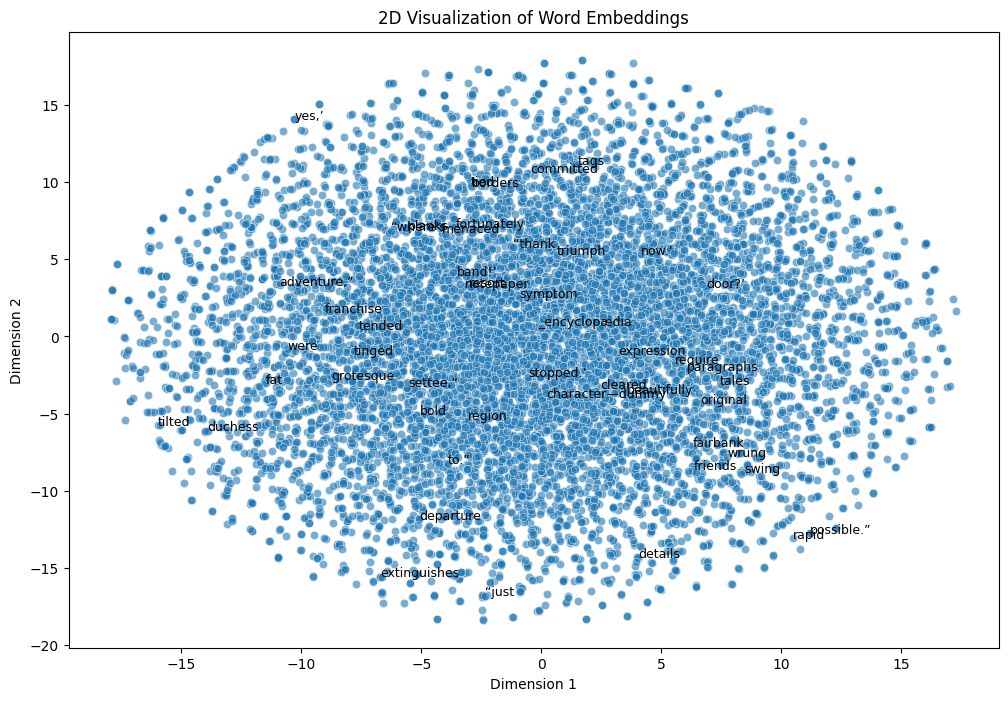

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns

# Get the embeddings from the trained model
embeddings = model.emb.weight.detach().cpu().numpy()

# Check dimensionality of embeddings
embedding_dim = embeddings.shape[1]
print(f"Embedding dimension: {embedding_dim}")

# Apply t-SNE if embedding dimensions are more than 2
if embedding_dim > 2:
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d = tsne.fit_transform(embeddings)
else:
    embeddings_2d = embeddings  # Use the raw 2D embeddings

# Create a scatter plot of the embeddings
plt.figure(figsize=(12, 8))
sns.scatterplot(x=embeddings_2d[:, 0], y=embeddings_2d[:, 1], alpha=0.6)

# Annotate some words to check the context
num_words_to_label = 50  # Adjust the number for readability
words_to_label = np.random.choice(len(vocab), num_words_to_label, replace=False)

for i in words_to_label:
    plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], itos[i + 1], fontsize=9)

plt.title("2D Visualization of Word Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()
